In [23]:
# 네이버 API 사용

import requests # HTTP 요청을 보내는 모듈
import pandas as pd
import matplotlib.pyplot as plt
import random
import pytagcloud #말뭉치 구름 형성 라이브러리
import webbrowser#웹 기반 문서를 사용자에게 표시할 수 있는 고수준 인터페이스를 제공

client_id = "vfWfdjH8P62AiPuDjNRs" # 네이버 api Client ID
client_secret = "i7m_dOLHIh"  # 네이버 api Client Secret

pygame 2.0.1 (SDL 2.0.14, Python 3.7.0)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [36]:
search_word = '카드연체' # 검색어
encode_type = 'json' # 출력 방식 json 또는 xml
max_display = 100 # 출력 뉴스 수
sort = 'sim' # 결과값의 정렬기준 시간순 date, 관련도 순 sim
start = 1 # 출력 위치

# get 메서드를 사용하여 네이버 기사를 검색해오기
url = f"https://openapi.naver.com/v1/search/news.{encode_type}?query={search_word}&display={str(int(max_display))}&start={str(int(start))}&sort={sort}"

# 헤더에 아이디와 키 정보 빙력
headers = {'X-Naver-Client-Id' : client_id,
           'X-Naver-Client-Secret':client_secret
           }

#HTTP요청 보내기 (r = response)
r = requests.get(url, headers=headers)
#요청 결과 보기 200 이면 정상적으로 요청 완료
print(r)

<Response [200]>


In [3]:
#json 형식으로 보기
r.json()

{'lastBuildDate': 'Wed, 26 May 2021 21:33:43 +0900',
 'total': 77490,
 'start': 1,
 'display': 100,
 'items': [{'title': '[단독]풍선효과에...정부, <b>카드</b>론 총량관리 재개',
   'originallink': 'https://www.sedaily.com/NewsView/22MIEAYO6P',
   'link': 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=011&aid=0003915070',
   'description': '<b>카드</b> 업계의 한 관계자는 “자영업자에 대한 대출원리금상환유예 조치가 끝나는 9월 이후 <b>연체</b>율이 올라가면 <b>카드</b>사는 신규 대출의 경우 신용도가 높은 사람에게 집중해 전체 <b>연체</b>율을 낮추는 대응을 할 수밖에 없다”... ',
   'pubDate': 'Wed, 26 May 2021 16:31:00 +0900'},
  {'title': '현대<b>카드</b>, 씨티銀 <b>카드</b>사업부 인수하나…지각변동 예고',
   'originallink': 'http://news.tf.co.kr/read/economy/1863597.htm',
   'link': 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=629&aid=0000085307',
   'description': '<b>연체</b>율이나 평균 소득을 포함한 금융 소비자의 질적인 측면에서는 점유율이 높은 타 <b>카드</b>사보다 우수하다는 평가를 받는다. 미국 영업방식을 접목한 덕에 리볼빙 분야에도 강점이 있다. 리볼빙은 금융 소비자가 정한... ',
   'pubDate': 'Wed, 26 May 2021 13:36:00 +0900'},
  {'title': '1천만원 10년 넘게 못

In [5]:
df = pd.DataFrame(r.json()['items'])
type(df)
df

,description,link,originallink,pubDate,title
0,<b>카드</b> 업계의 한 관계자는 “자영업자에 대한 대출원리금상환유예 조치가 끝...,https://news.naver.com/main/read.nhn?mode=LSD&...,https://www.sedaily.com/NewsView/22MIEAYO6P,"Wed, 26 May 2021 16:31:00 +0900","[단독]풍선효과에...정부, <b>카드</b>론 총량관리 재개"
1,<b>연체</b>율이나 평균 소득을 포함한 금융 소비자의 질적인 측면에서는 점유율이...,https://news.naver.com/main/read.nhn?mode=LSD&...,http://news.tf.co.kr/read/economy/1863597.htm,"Wed, 26 May 2021 13:36:00 +0900","현대<b>카드</b>, 씨티銀 <b>카드</b>사업부 인수하나…지각변동 예고"
2,채권 소각이 <b>연체</b>자의 원활한 <b>카드</b> 발급이나 대출에 직접적인...,https://news.naver.com/main/read.nhn?mode=LSD&...,http://yna.kr/AKR20210517069100002?did=1195m,"Mon, 17 May 2021 12:00:00 +0900",1천만원 10년 넘게 못갚은 <b>연체</b>자 29만명 대출 1조5천억 소각
3,엔에이치(NH)농협은행 일부 직원들이 본인이나 가족 명의의 신용<b>카드</b> 결...,https://news.naver.com/main/read.nhn?mode=LSD&...,http://www.hani.co.kr/arti/economy/finance/995...,"Wed, 19 May 2021 10:50:00 +0900",농협은행 직원들 <b>카드연체</b> 막으려 전산조작했으나 당국은 과태료만 부과
4,올 1분기 신한<b>카드</b>의 1개월 이상 <b>연체</b>율은 0.96%를 기...,https://news.naver.com/main/read.nhn?mode=LSD&...,https://biz.chosun.com/stock/finance/2021/05/2...,"Thu, 20 May 2021 15:27:00 +0900","<b>카드</b>사, 리스·할부 증가 힘입어 1분기 실적 ‘활짝’… 평균 급여도 껑충"
5,채권 소각이 <b>연체</b>자의 원활한 <b>카드</b> 발급이나 대출에 직접적인...,https://news.naver.com/main/read.nhn?mode=LSD&...,http://www.segye.com/content/html/2021/05/17/2...,"Mon, 17 May 2021 22:02:00 +0900",1000만원 10년 넘게 못 갚은 <b>연체</b>자 29만명 채무탕감
6,그러자 은성수 금융위원장은 지난달 초 <b>카드</b>·캐피탈·저축은행 대표 간담회...,https://news.naver.com/main/read.nhn?mode=LSD&...,https://view.asiae.co.kr/article/2021051809475...,"Tue, 18 May 2021 11:00:00 +0900",첫 발 내딛은 '햇살론 <b>카드</b>'…8개 <b>카드</b>사 &quot;참여...
7,자영업자 원리금상환유예 정책이 종료되면 <b>연체</b>율은 올라갈 것이고 결국 신...,https://news.naver.com/main/read.nhn?mode=LSD&...,https://www.sedaily.com/NewsView/22MIFAYS3Y,"Wed, 26 May 2021 17:00:00 +0900",<b>카드</b>론 총량규제 재개···저신용자 대출 문턱 높아질듯
8,신한<b>카드</b>의 경우 1분기 <b>연체</b>율(1개월 이상) 0.96%를 ...,https://news.naver.com/main/read.nhn?mode=LSD&...,http://news.tf.co.kr/read/economy/1862555.htm,"Fri, 21 May 2021 11:48:00 +0900","<b>카드</b>사, 1분기 실적 잔치에도 표정 관리 나선 이유는"
9,'<b>카드</b>대란' 직전이었던 2002년말 당시 1개월 이상 <b>카드</b>...,https://news.naver.com/main/read.nhn?mode=LSD&...,http://news.mt.co.kr/mtview.php?no=20210518134...,"Tue, 18 May 2021 20:01:00 +0900","<b>카드</b>론 사상최고인데, <b>연체</b>율은 최저 수준 '아이러니'"


In [6]:
#정규 표현식을 쓰기 위한 라이브러리
import re

In [7]:
#정규 표현식을 이용하여 html 코드의 불필요한 항목 제거
#함수 정의
def clean_html(x):
    x = re.sub("\&\w*\;","",x) #&quot(쌍따옴표) 제거
    x = re.sub("<.*?>","",x) #<b>, </b> 제거
    return x

#title과 description에만 clean_html() 적용
df['title'] = df['title'].apply(lambda x : clean_html(x))
df['description'] = df['description'].apply(lambda x : clean_html(x))

In [8]:
#필요없는 컬럼 삭제
del df["link"]
del df["originallink"]
del df["pubDate"]
df

,description,title
0,카드 업계의 한 관계자는 “자영업자에 대한 대출원리금상환유예 조치가 끝나는 9월 이...,"[단독]풍선효과에...정부, 카드론 총량관리 재개"
1,연체율이나 평균 소득을 포함한 금융 소비자의 질적인 측면에서는 점유율이 높은 타 카...,"현대카드, 씨티銀 카드사업부 인수하나…지각변동 예고"
2,채권 소각이 연체자의 원활한 카드 발급이나 대출에 직접적인 영향을 주는 것는 아니다...,1천만원 10년 넘게 못갚은 연체자 29만명 대출 1조5천억 소각
3,엔에이치(NH)농협은행 일부 직원들이 본인이나 가족 명의의 신용카드 결제대금을 갚은...,농협은행 직원들 카드연체 막으려 전산조작했으나 당국은 과태료만 부과
4,올 1분기 신한카드의 1개월 이상 연체율은 0.96%를 기록했다. 지난해 1분기(1...,"카드사, 리스·할부 증가 힘입어 1분기 실적 ‘활짝’… 평균 급여도 껑충"
5,채권 소각이 연체자의 원활한 카드 발급이나 대출에 직접적인 영향을 주는 것은 아니다...,1000만원 10년 넘게 못 갚은 연체자 29만명 채무탕감
6,그러자 은성수 금융위원장은 지난달 초 카드·캐피탈·저축은행 대표 간담회에서 보증 비...,첫 발 내딛은 '햇살론 카드'…8개 카드사 참여하겠다
7,자영업자 원리금상환유예 정책이 종료되면 연체율은 올라갈 것이고 결국 신규 대출을 우...,카드론 총량규제 재개···저신용자 대출 문턱 높아질듯
8,신한카드의 경우 1분기 연체율(1개월 이상) 0.96%를 기록했다. 지난해 1분기(...,"카드사, 1분기 실적 잔치에도 표정 관리 나선 이유는"
9,'카드대란' 직전이었던 2002년말 당시 1개월 이상 카드대출 연체율이 거의 9%에...,"카드론 사상최고인데, 연체율은 최저 수준 '아이러니'"


In [9]:
#csv 파일로 저장
#'utf-8-sig'를 사용하면 문자열로 처리하는게 아니라 Byte Order Mark(BOM) 으로 처리
#BOM: 문서 맨 앞에 눈에 보이지 않는 특정 바이트를 넣은 다음 이것이 해석해서 정확히 어떤 인코딩 방식이 사용되었는지 알아내는 방법
df2 = df.to_csv(f'news_search_result_{search_word}.csv', encoding='utf-8-sig')

In [10]:
!pip install wordcloud

You should consider upgrading via the 'd:\anaconda3\python.exe -m pip install --upgrade pip' command.


In [11]:
#Open-Korean-tect: 과거 트위터 형태소 분석기, 옥토끼
from konlpy.tag import Okt
from collections import Counter #단어 개수를 카운트하는 라이브러리
from wordcloud import WordCloud #워드클라우드 라이브러리

In [12]:
print(df)

                                          description  \
0   카드 업계의 한 관계자는 “자영업자에 대한 대출원리금상환유예 조치가 끝나는 9월 이...   
1   연체율이나 평균 소득을 포함한 금융 소비자의 질적인 측면에서는 점유율이 높은 타 카...   
2   채권 소각이 연체자의 원활한 카드 발급이나 대출에 직접적인 영향을 주는 것는 아니다...   
3   엔에이치(NH)농협은행 일부 직원들이 본인이나 가족 명의의 신용카드 결제대금을 갚은...   
4   올 1분기 신한카드의 1개월 이상 연체율은 0.96%를 기록했다. 지난해 1분기(1...   
5   채권 소각이 연체자의 원활한 카드 발급이나 대출에 직접적인 영향을 주는 것은 아니다...   
6   그러자 은성수 금융위원장은 지난달 초 카드·캐피탈·저축은행 대표 간담회에서 보증 비...   
7   자영업자 원리금상환유예 정책이 종료되면 연체율은 올라갈 것이고 결국 신규 대출을 우...   
8   신한카드의 경우 1분기 연체율(1개월 이상) 0.96%를 기록했다. 지난해 1분기(...   
9   '카드대란' 직전이었던 2002년말 당시 1개월 이상 카드대출 연체율이 거의 9%에...   
10  구축한 카드사들은 연체율을 낮춰서 수익성을 극대화할 수 있을 것“이라고 분석했다. ...   
11  그러자 은성수 금융위원장은 지난달 초 카드·캐피탈·저축은행 대표 간담회에서 보증 비...   
12  채권 소각이 연체자의 원활한 카드 발급이나 대출에 직접적인 영향을 주는 것은 아니다...   
13  현대카드는 올해 1분기 영업수익이 6942억원으로 336억원 늘었지만, 영업비용은 ...   
14  이어 금융위의 추가 유예조치가 없는 이상 10월부터 만기연장·이자상환 유예조치가 종...   
15  연체율도 상위권 카드사를 중심으로 눈에 띄게 개선됐다. 코로나19 장기화에 따른 정...   
16  연체 상황에 놓인 채무자는 연체기록이 금융회사에 

In [15]:
#명사 추출
def get_noun(df):
    t = Okt() #Okt 객체 선언
    noun = t.nouns(df) #명사만 추출해서 리스트에 담기
    for i, v in enumerate(noun): #i: index, v: value
        if len(v) < 2:
            noun.pop(i)
    count = Counter(noun)
    noun_list = count.most_common(100) #빈도가 높은 100개의 명사 카운트
    return noun_list

#시각화
def visualize(noun_list):
    wc = WordCloud(font_path=
                  'D:/Anaconda3/Lib/site-packages/pytagcloud/fonts/NanumGothic.ttf',
                  width = 1000,
                  height = 1000,
                  background_color = "white",
                  max_words = 100,
                  max_font_size = 300)
    wc.generate_from_frequencies(dict(noun_list))
    wc.to_file(f'{search_word}.png')
    
if __name__=="__main__":
    f = open(f'news_search_result_{search_word}.csv', mode='r', encoding='utf-8')
    df = f.read() #파일 읽기
    noun_list = get_noun(df) #명사 추출
    visualize(noun_list) #시각화
    
print(noun_list)

[('카드', 230), ('연체', 166), ('대출', 46), ('금융', 45), ('업계', 42), ('포인트', 36), ('신용', 31), ('지난해', 29), ('비율', 28), ('대비', 28), ('채권', 27), ('장기', 22), ('부담', 22), ('신용카드', 21), ('증가', 21), ('햇살', 21), ('로', 21), ('소액', 20), ('결제', 20), ('상환', 18), ('하락', 18), ('이상', 17), ('위원장', 17), ('것', 17), ('개선', 16), ('성수', 16), ('코로나', 16), ('순이익', 16), ('소각', 15), ('현대', 14), ('발급', 14), ('개월', 14), ('보증', 14), ('관계자', 13), ('유예', 13), ('영향', 13), ('은행', 13), ('예정', 13), ('정부', 12), ('신한카드', 12), ('기록', 12), ('캐피탈', 12), ('기간', 12), ('소비', 12), ('호실', 12), ('수수료', 12), ('때문', 11), ('운영', 11), ('매우', 11), ('우려', 11), ('건전성', 11), ('올해', 11), ('년', 11), ('이자', 11), ('기준', 11), ('영업', 10), ('실적', 10), ('은', 10), ('서비스', 10), ('이력', 10), ('후불', 10), ('관리', 9), ('정보', 9), ('당국', 9), ('수익', 9), ('말', 9), ('조치', 8), ('경우', 8), ('국민카드', 8), ('수준', 8), ('가능성', 8), ('인하', 8), ('점수', 8), ('이용', 8), ('효과', 7), ('포함', 7), ('리볼빙', 7), ('저축은행', 7), ('출시', 7), ('회사', 7), ('회복', 7), ('자산', 7), ('부채', 7), ('동기', 7

(-0.5, 399.5, 199.5, -0.5)

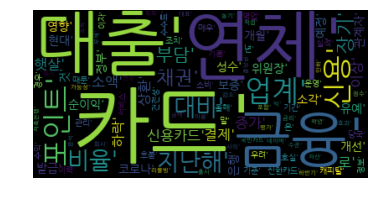

In [31]:
wordcloud2 = WordCloud(font_path='D:/Anaconda3/Lib/site-packages/pytagcloud/fonts/NanumGothic.ttf',
                       max_font_size=100).generate(str(noun_list))


fig = plt.figure()
#이차원 보간법으로 단어구름 형성
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis('off')